# Exploratory Data Analysis (EDA) on Retail Sales Data

## **Introduction**
This project aims to perform exploratory data analysis (EDA) on a retail sales dataset to uncover patterns, trends, and actionable insights that can help the business make informed decisions. Key areas of focus include sales trends, customer behavior, product performance, and recommendations for improvement.

**Dataset Description:**
- The dataset includes sales transactions with details about customers, products, and revenue.
- Key columns: Date, Age, Gender, Product Category, Quantity, Price per Unit, Total Amount.


## **Scope of Work**
1. **Data Loading and Cleaning:** Load the retail sales dataset.
2. **Descriptive Statistics:** Calculate basic statistics (mean, median, mode, standard deviation).
3. **Time Series Analysis:** Analyze sales trends over time using time series techniques.
4. **Customer and Product Analysis:** Analyze customer demographics and purchasing behavior.
5. **Visualization:** Present insights through bar charts, line plots, and heatmaps.
6. **Recommendations:** Provide actionable insights based on findings.


## **Data Loading and Cleaning**
The dataset is loaded, and initial cleaning steps include:
1. Checking for missing values.
2. Identifying and removing duplicate rows.
3. Verifying data types for accurate analysis.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [3]:
#load dataset
file_path='C:/Users/ADMIN/Desktop/WORK/Jobs/Oasis_Internship/retail_sales_dataset.csv'
df=pd.read_csv(file_path)
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [6]:
# Cleaning data
## Check for missing values
print('Missing Values: ')
print(df.isnull().sum())
# Duplicates
print('\nDuplicates:')
print(f'Number of duplicate rows: {df.duplicated().sum()}')

# Data types
print("\nData Types:")
print(df.dtypes)


Missing Values: 
Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

Duplicates:
Number of duplicate rows: 0

Data Types:
Transaction ID       int64
Date                object
Customer ID         object
Gender              object
Age                  int64
Product Category    object
Quantity             int64
Price per Unit       int64
Total Amount         int64
dtype: object



We can clearly see that there are no:
1. Missing values.
2. Duplicate rows.
3. Data types are accurate for analysis.


## **Descriptive Statistics**
Summary statistics provide insights into numerical columns such as `Price per Unit`, `Total Amount`, and `Age`. These metrics include:
- Mean
- Median
- Standard Deviation
- Min and Max values


In [7]:
# Summary statistics for all numeric columns
print(df.describe())

       Transaction ID         Age     Quantity  Price per Unit  Total Amount
count     1000.000000  1000.00000  1000.000000     1000.000000   1000.000000
mean       500.500000    41.39200     2.514000      179.890000    456.000000
std        288.819436    13.68143     1.132734      189.681356    559.997632
min          1.000000    18.00000     1.000000       25.000000     25.000000
25%        250.750000    29.00000     1.000000       30.000000     60.000000
50%        500.500000    42.00000     3.000000       50.000000    135.000000
75%        750.250000    53.00000     4.000000      300.000000    900.000000
max       1000.000000    64.00000     4.000000      500.000000   2000.000000


## **Time Series Analysis**
**Objective:** Understand sales trends over time.
1. The `Date` column is converted to a datetime format.
2. Monthly sales totals are calculated using `.resample('M').sum()`.
3. A line plot illustrates monthly sales trends.


In [32]:
#Time Series Analysis: Analyze Sales Trends Over Time
#Data Type correction
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df['Price per Unit'] = pd.to_numeric(df['Price per Unit'], errors='coerce') 
df['Total Amount'] = pd.to_numeric(df['Total Amount'], errors='coerce')  

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_20236\3797226617.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df['Total Amount'].resample('M').sum()


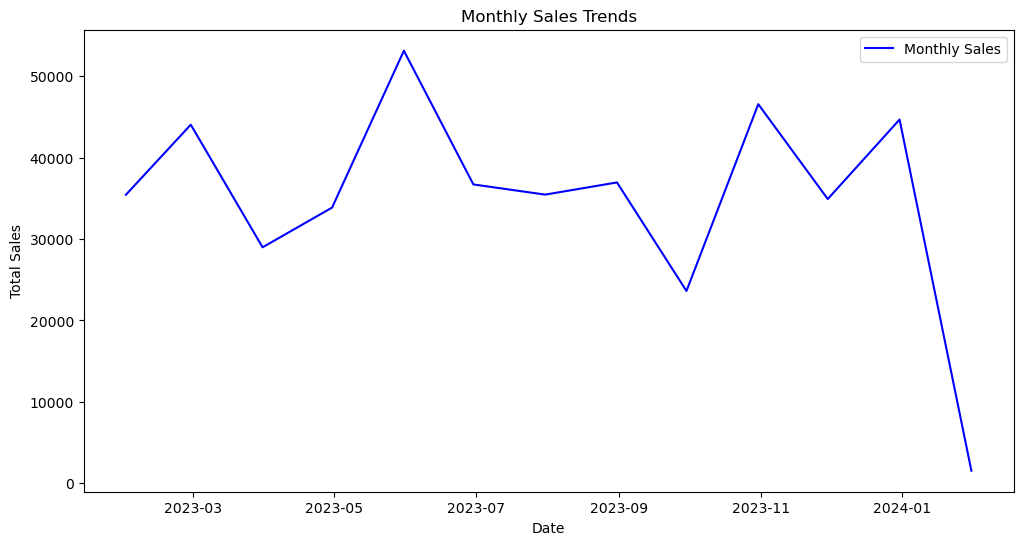

In [34]:
#Analyze sales trends over time
monthly_sales = df['Total Amount'].resample('M').sum()
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales, label='Monthly Sales', color='blue')
plt.title('Monthly Sales Trends')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.legend()
plt.show()

### Monthly Sales Trends
- The line graph shows fluctuations in total sales over a period of approximately one year.
- There is a significant peak in sales around **July 2023**.


## **Customer and Product Analysis**
This section examines customer demographics and product performance.

1. **Customer Age Distribution**
   - Visualize the age distribution of customers using a histogram.

2. **Gender Distribution**
   - Show the proportion of male and female customers using a pie chart.

3. **Product Performance**
   - Identify top-performing product categories based on quantity purchased and total spending using bar charts.


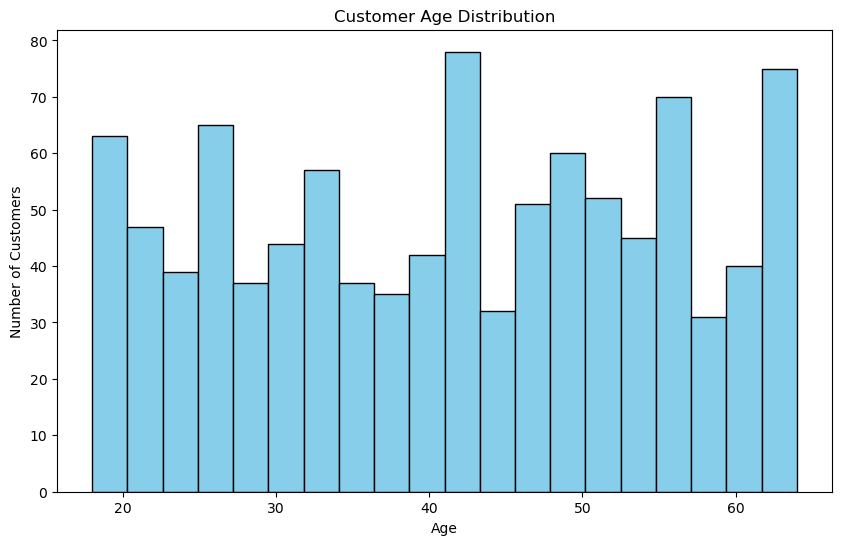

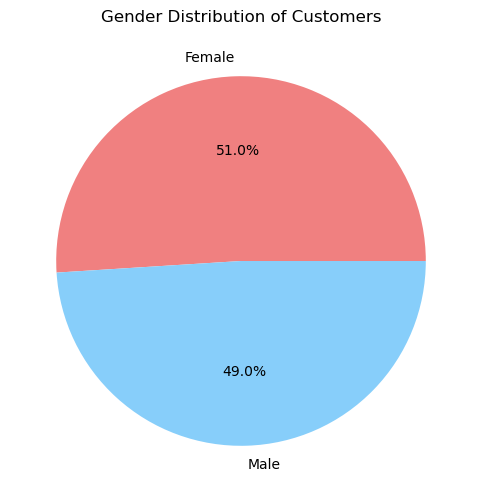

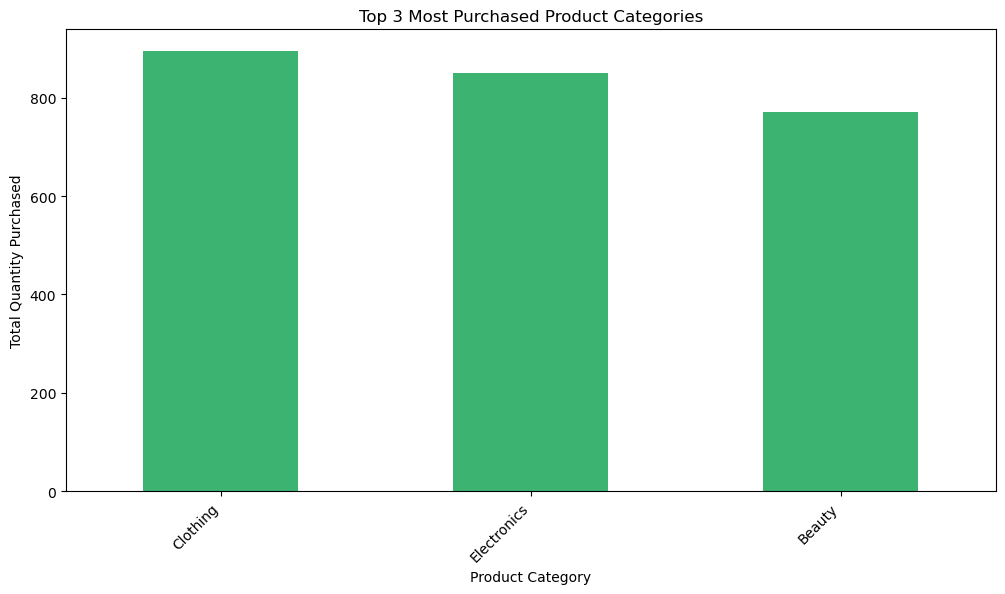

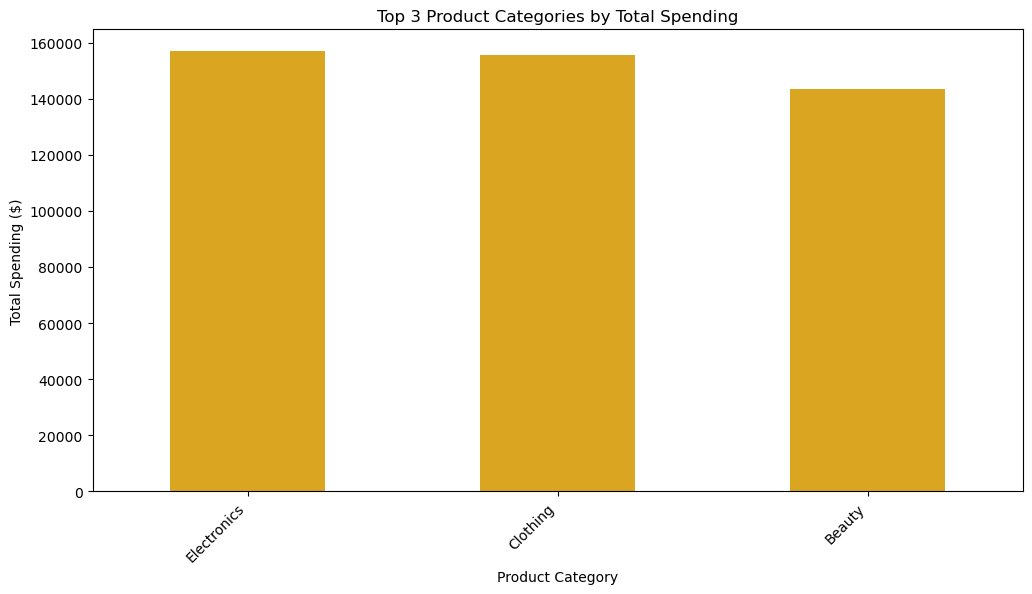

In [8]:
#Customer and Product Analysis
# Plot Age Distribution
plt.figure(figsize=(10, 6))
plt.hist(df['Age'].dropna(), bins=20, color='skyblue', edgecolor='black')
plt.title('Customer Age Distribution')
plt.xlabel('Age')
plt.ylabel('Number of Customers')
plt.show()
# Gender Distribution
gender_counts = df['Gender'].value_counts()
plt.figure(figsize=(6, 6))
gender_counts.plot(kind='pie', autopct='%1.1f%%', colors=['lightcoral', 'lightskyblue'])
plt.title('Gender Distribution of Customers')
plt.ylabel('')  # Hide the y-axis label
plt.show()
# Most Purchased Product Categories
category_sales = df.groupby('Product Category')['Quantity'].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
category_sales.head(10).plot(kind='bar', color='mediumseagreen')
plt.title('Top 3 Most Purchased Product Categories')
plt.xlabel('Product Category')
plt.ylabel('Total Quantity Purchased')
plt.xticks(rotation=45, ha='right')
plt.show()
# Total Spending by Product Category
category_spending = df.groupby('Product Category')['Total Amount'].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
category_spending.head(10).plot(kind='bar', color='goldenrod')
plt.title('Top 3 Product Categories by Total Spending')
plt.xlabel('Product Category')
plt.ylabel('Total Spending ($)')
plt.xticks(rotation=45, ha='right')
plt.show()


## Customer Age Distribution

- The histogram shows the distribution of customer ages in the dataset.
- There is a noticeable peak in the 40s, suggesting that the retail store primarily caters to middle-aged customers.
- This demographic should be a key focus for marketing and product placement strategies.

---

## Gender Distribution

- The pie chart reveals the gender distribution of customers:
  - Approximately **51% of customers are female**, and **49% are male**.
- The customer base is fairly evenly split between genders, indicating balanced representation.
- Marketing strategies should be tailored to appeal to both genders equally to maximize engagement.

---

## Top 10 Purchased Product Categories

- The bar chart highlights the most purchased product categories:
  - **Clothing** emerges as the most popular category by quantity sold.
- This suggests that the retail store's clothing section is performing well in terms of customer interest.
- Focus on maintaining variety and stock in the clothing category to sustain its popularity.

---

## Top 10 Categories by Spending

- The bar chart shows the product categories generating the highest revenue:
  - **Electronics** is the leading category by total spending.
- While clothing is the most purchased category, electronics generate more revenue.
- Strategies to promote electronics, such as bundled offers or financing options, could further boost sales in this high-revenue category.


## **Correlation Analysis**
This section examines the relationships between numerical variables such as `Age`, `Quantity`, `Price per Unit`, and `Total Amount`.

- A correlation matrix is computed using `df.corr()`.
- A heatmap is generated to visualize correlations.

**Key Insights:**
- Positive and negative correlations can indicate relationships between sales, pricing, and customer demographics.


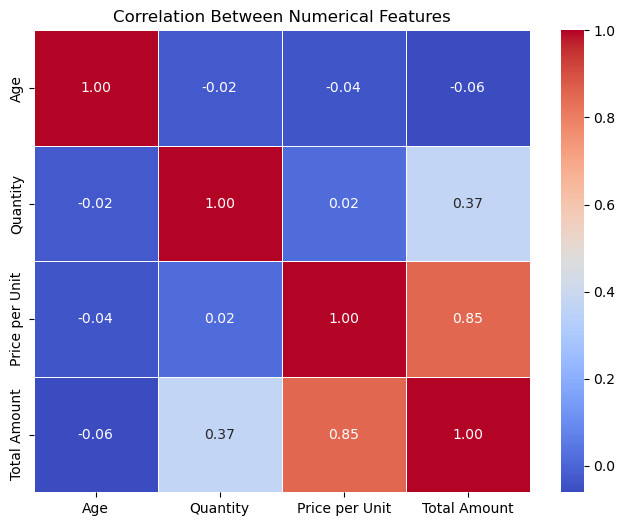

In [46]:
#More visualizations
# Compute correlation matrix
correlation_matrix = df[['Age', 'Quantity', 'Price per Unit', 'Total Amount']].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Between Numerical Features')
plt.show()



## Correlation Matrix

- The heatmap illustrates correlations between numerical features:
  - A strong positive correlation (**0.85**) exists between **Price per Unit** and **Total Amount**.
  - A moderate positive correlation (**0.37**) is observed between **Quantity** and **Total Amount**.
- Insights:
  - As expected, higher-priced items contribute significantly to total revenue.
  - Encouraging bulk purchases or offering volume discounts could leverage the correlation between quantity and total amount to increase sales.


## 6. Recommendations
Based on the findings from the exploratory data analysis, the following actionable recommendations are proposed:

1. **Focus on Middle-Aged Customers**:
   - Since the majority of customers are middle-aged, tailor marketing campaigns and promotions to appeal to this demographic. Highlight products like clothing and electronics, which are popular among this age group.

2. **Capitalize on Electronics Revenue**:
   - Invest in strategies to promote high-revenue categories like electronics, such as bundling deals, extended warranties, or exclusive product launches.

3. **Optimize Clothing Category**:
   - Although clothing is the most purchased category, it generates less revenue compared to electronics. Consider introducing higher-margin items in this category to boost profitability.

4. **Gender-Specific Campaigns**:
   - With the gender distribution nearly balanced, create targeted campaigns for both male and female customers to increase engagement and sales.

5. **Encourage Bulk Purchases**:
   - Leverage the positive correlation between quantity sold and total revenue. Introduce discounts for bulk purchases to maximize sales volume and revenue.

6. **Seasonal Promotions**:
   - Based on the sales peak in July 2023, investigate potential causes (e.g., seasonal demand, holidays) and plan similar promotions for future periods to replicate the success.
